# BERT_CLOTH

## 下載CLOTH資料集

In [ ]:
import gdown

url = "https://drive.google.com/uc?id=1G772ESUSkZq0ueRgRbtYYpW8Qo99qL67"
output = "CLOTH.zip"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1G772ESUSkZq0ueRgRbtYYpW8Qo99qL67
To: /content/drive/MyDrive/ML/BERT_CLOTH/CLOTH.zip
100%|██████████| 21.2M/21.2M [00:00<00:00, 116MB/s] 


'CLOTH.zip'

解壓縮 CLOTH.zip

In [ ]:
!unzip CLOTH.zip

Archive:  CLOTH.zip
  inflating: CLOTH/desktop.ini       
replace CLOTH/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## 綁定雲端硬碟

如果用上面的方式下載了CLOTH資料集，這步驟可以跳過

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/ML

/content/drive/My Drive/ML


In [7]:
ls -l

total 8
drwx------ 2 root root 4096 Mar 12 13:21 datasets/
drwx------ 2 root root 4096 Mar 12 13:21 models/


## 引用相關套件

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
from tqdm.notebook import tqdm
import json
import re
import os

## 資料預處理

### 資料集處理方式

#### 正確選項

In [ ]:
# 正確選項
en2num = {"A": 0, "B": 1, "C": 2, "D": 3}

input_list = list()
label_list = list()

for tv in ["train", "valid"]:
  tv_path = os.path.join("./CLOTH", tv)
  for grade in ["high", "middle"]:
    grade_path = os.path.join(tv_path, grade)
    # print(grade_path)

    files = os.listdir(grade_path)
    # print(files)

    for file in tqdm(files):
      if not ".json" in file:
        continue
      
      full_path = os.path.join(grade_path, file)
      # print(full_path)
      with open(full_path, "r") as f:
        dataset = json.load(f)

      sents = nltk.sent_tokenize(dataset["article"])
      options = dataset["options"]
      answers = dataset["answers"]

      i = 0
      for sent in sents:
        input_text = sent
        label_text = sent
        if "_" in sent:
          try:
            while "_" in input_text:
              input_text = input_text.replace("_", "[MASK]", 1)
              index = en2num[answers[i]]
              label_text = label_text.replace("_", options[i][index], 1)
              i += 1
              # print(i)
          except Exception as e:
            print(e)
            pass

          # print(input_text)
          # print(label_text)
          # print("-"*50)

          input_list.append(input_text)
          label_list.append(label_text)

  #     break
  #   break
  # break


  0%|          | 0/3173 [00:00<?, ?it/s]

  0%|          | 0/2342 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/356 [00:00<?, ?it/s]

#### 三個錯誤選項

In [ ]:
# 錯誤選項
en2num = {"A": 0, "B": 1, "C": 2, "D": 3}

input_list = list()
label_list = list()

for tv in ["train", "valid"]:
  tv_path = os.path.join("./CLOTH", tv)
  for grade in ["high", "middle"]:
    grade_path = os.path.join(tv_path, grade)
    # print(grade_path)

    files = os.listdir(grade_path)
    # print(files)

    for file in tqdm(files):
      full_path = os.path.join(grade_path, file)
      # print(full_path)
      with open(full_path, "r") as f:
        dataset = json.load(f)

      sents = nltk.sent_tokenize(dataset["article"])
      options = dataset["options"]
      answers = dataset["answers"]

      i = 0
      for sent in sents:
        input_text = sent
        label_text = sent
        if "_" in sent:
          try:
            while "_" in input_text:
              input_text = input_text.replace("_", "[MASK]", 1)
              answer_index = en2num[answers[i]]
              # print(i)
              # print("answer:", options[i][answer_index])
              # print(input_text)
              for j in range(4):
                if j != answer_index:
                  input_list.append(input_text)
                  temp_text = label_text.replace("_", options[i][j], 1)
                  label_list.append(temp_text)
                  # print(temp_text)
              
              label_text = label_text.replace("_", options[i][answer_index], 1)
              i += 1
          except Exception as e:
            print(e)
            pass

          # print(input_text)
          # print(label_text)
          # print("-"*50)

          input_list.append(input_text)
          label_list.append(label_text)

  #     break
  #   break
  # break

  0%|          | 0/3172 [00:00<?, ?it/s]

  0%|          | 0/2341 [00:00<?, ?it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

  0%|          | 0/355 [00:00<?, ?it/s]

#### 一個錯誤選項

In [ ]:
# 單一錯誤
en2num = {"A": 0, "B": 1, "C": 2, "D": 3}

input_list = list()
label_list = list()

for tv in ["train", "valid"]:
  tv_path = os.path.join("./CLOTH", tv)
  for grade in ["high", "middle"]:
    grade_path = os.path.join(tv_path, grade)
    print(grade_path)

    files = os.listdir(grade_path)
    # print(files)

    for file in tqdm(files):
      full_path = os.path.join(grade_path, file)
      # print(full_path)
      with open(full_path, "r") as f:
        dataset = json.load(f)

      sents = nltk.sent_tokenize(dataset["article"])
      options = dataset["options"]
      answers = dataset["answers"]

      i = 0
      for sent in sents:
        input_text = sent
        label_text = sent
        try:
          while "_" in input_text:
            ans_index = en2num[answers[i]]
            if ans_index == 0:
              dis_index = 1
            else:
              dis_index = 0

            input_text = input_text.replace("_", "[MASK]", 1)
            input_list.append(input_text)
            label_text = label_text.replace("_", options[i][dis_index], 1)
            label_list.append(label_text)

            # print(input_text)
            # print(label_text)
            # print("-"*50)

            i += 1

        except Exception as e:
          print(e)

  0%|          | 0/3172 [00:00<?, ?it/s]

  0%|          | 0/2341 [00:00<?, ?it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

  0%|          | 0/355 [00:00<?, ?it/s]

#### 單一錯誤 + SEP + 正確選項

In [ ]:
# 單一錯誤 + SEP + 正確選項
en2num = {"A": 0, "B": 1, "C": 2, "D": 3}

input_list = list()
label_list = list()

for tv in ["train", "valid"]:
  tv_path = os.path.join("./CLOTH", tv)
  for grade in ["high", "middle"]:
    grade_path = os.path.join(tv_path, grade)
    # print(grade_path)

    files = os.listdir(grade_path)
    # print(files)

    for file in tqdm(files):
      full_path = os.path.join(grade_path, file)
      # print(full_path)

      if not file.endswith(".json"):
        continue
      
      with open(full_path, "r") as f:
        dataset = json.load(f)

      sents = nltk.sent_tokenize(dataset["article"])
      options = dataset["options"]
      answers = dataset["answers"]

      i = 0
      for sent in sents:
        # print(sent)
        blank_num = sent.count("_")
        blank_texts = sent.split("_")
        for j in range(blank_num):
          input_text = ""
          label_text = ""
          k = 0
          for blank_text in blank_texts:
            if k == blank_num:
              answer_index = answer_index = en2num[answers[i+j]]
              answer = options[i+j][answer_index]

              # masked
              input_text = input_text + blank_text + " [SEP] " + answer
              input_list.append(input_text)

              # 錯誤選項
              label_text = label_text + blank_text + " [SEP] " + answer
              label_list.append(label_text)

              # print(input_text)
              # print(label_text)
              # print("-"*50)

              break
            
            # 得到ans和dis的索引值
            ans_index = en2num[answers[i+k]]
            if ans_index == 0:
              dis_index = 1
            else:
              dis_index = 0
            
            if k == j:  # 要被mask的
              dis = options[i+k][dis_index]
              label_text = label_text + blank_text + dis
              input_text = input_text + blank_text + "[MASK]"
            else: # 其他不是被mask的
              ans = options[i+k][ans_index]
              label_text = label_text + blank_text + ans
              input_text = input_text + blank_text + ans
            
            # print("options:", options[i+k])
            # print("ans_index:", ans_index)
            # print("dis_index:", dis_index)
              
            k += 1
            
        i += blank_num
      
  #     break
  #   break
  # break

  0%|          | 0/3172 [00:00<?, ?it/s]

  0%|          | 0/2341 [00:00<?, ?it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

  0%|          | 0/355 [00:00<?, ?it/s]

#### 三個錯誤 + SEP + 正確選項

In [9]:
# 三個錯誤 + SEP + 正確選項
en2num = {"A": 0, "B": 1, "C": 2, "D": 3}

input_list = list()
label_list = list()

for tv in ["train", "valid"]:
  tv_path = os.path.join("./datasets/CLOTH", tv)
  for grade in ["high", "middle"]:
    grade_path = os.path.join(tv_path, grade)
    # print(grade_path)

    files = os.listdir(grade_path)
    # print(files)

    for file in tqdm(files):
      full_path = os.path.join(grade_path, file)
      # print(full_path)

      if not file.endswith(".json"):
        continue
      
      with open(full_path, "r") as f:
        dataset = json.load(f)

      sents = nltk.sent_tokenize(dataset["article"])
      options = dataset["options"]
      answers = dataset["answers"]

      i = 0
      for sent in sents:
        # print(sent)
        blank_num = sent.count("_")
        blank_texts = sent.split("_")
        for j in range(blank_num):
          input_text = ""
          label_text1 = ""
          label_text2 = ""
          label_text3 = ""
          k = 0
          for blank_text in blank_texts:
            if k == blank_num:
              answer_index = answer_index = en2num[answers[i+j]]
              answer = options[i+j][answer_index]

              # masked
              input_text = input_text + blank_text + " [SEP] " + answer
              input_list.append(input_text)
              input_list.append(input_text)
              input_list.append(input_text)

              # 錯誤選項
              label_text1 = label_text1 + blank_text + " [SEP] " + answer
              label_list.append(label_text1)
              label_text2 = label_text2 + blank_text + " [SEP] " + answer
              label_list.append(label_text2)
              label_text3 = label_text3 + blank_text + " [SEP] " + answer
              label_list.append(label_text3)

              # print(input_text)
              # print(label_text)
              # print("-"*50)

              break
            
            # 得到ans和dis的索引值
            ans_index = en2num[answers[i+k]]
            dis_indexs = [0, 1, 2, 3]
            dis_indexs.remove(ans_index)
            # print(ans_index)
            # print(dis_indexs)
            
            if k == j:  # 要被mask的
              input_text = input_text + blank_text + "[MASK]"
              label_text1 = label_text1 + blank_text + options[i+k][dis_indexs[0]]
              label_text2 = label_text2 + blank_text + options[i+k][dis_indexs[1]]
              label_text3 = label_text3 + blank_text + options[i+k][dis_indexs[2]]
            else: # 其他不是被mask的
              ans = options[i+k][ans_index]
              input_text = input_text + blank_text + ans
              label_text1 = label_text1 + blank_text + ans
              label_text2 = label_text2 + blank_text + ans
              label_text3 = label_text3 + blank_text + ans
            
            # print("options:", options[i+k])
            # print("ans_index:", ans_index)
            # print("dis_index:", dis_index)
              
            k += 1
            
        i += blank_num
      
  #     break
  #   break
  # break

  0%|          | 0/3172 [00:00<?, ?it/s]

  0%|          | 0/2341 [00:00<?, ?it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

  0%|          | 0/355 [00:00<?, ?it/s]

#### 三個錯誤

In [ ]:
# 三個錯誤 + SEP + 正確選項
en2num = {"A": 0, "B": 1, "C": 2, "D": 3}

input_list = list()
label_list = list()

for tv in ["train", "valid"]:
  tv_path = os.path.join("./datasets/CLOTH", tv)
  for grade in ["high", "middle"]:
    grade_path = os.path.join(tv_path, grade)
    # print(grade_path)

    files = os.listdir(grade_path)
    # print(files)

    for file in tqdm(files):
      full_path = os.path.join(grade_path, file)
      # print(full_path)

      if not file.endswith(".json"):
        continue
      
      with open(full_path, "r") as f:
        dataset = json.load(f)

      sents = nltk.sent_tokenize(dataset["article"])
      options = dataset["options"]
      answers = dataset["answers"]

      i = 0
      for sent in sents:
        # print(sent)
        blank_num = sent.count("_")
        blank_texts = sent.split("_")
        for j in range(blank_num):
          input_text = ""
          label_text1 = ""
          label_text2 = ""
          label_text3 = ""
          k = 0
          for blank_text in blank_texts:
            if k == blank_num:
              answer_index = answer_index = en2num[answers[i+j]]
              answer = options[i+j][answer_index]

              # masked
              input_text = input_text + blank_text
              input_list.append(input_text)
              input_list.append(input_text)
              input_list.append(input_text)

              # 錯誤選項
              label_text1 = label_text1 + blank_text
              label_list.append(label_text1)
              label_text2 = label_text2 + blank_text
              label_list.append(label_text2)
              label_text3 = label_text3 + blank_text
              label_list.append(label_text3)

              # print(input_text)
              # print(label_text)
              # print("-"*50)

              break
            
            # 得到ans和dis的索引值
            ans_index = en2num[answers[i+k]]
            dis_indexs = [0, 1, 2, 3]
            dis_indexs.remove(ans_index)
            # print(ans_index)
            # print(dis_indexs)
            
            if k == j:  # 要被mask的
              input_text = input_text + blank_text + "[MASK]"
              label_text1 = label_text1 + blank_text + options[i+k][dis_indexs[0]]
              label_text2 = label_text2 + blank_text + options[i+k][dis_indexs[1]]
              label_text3 = label_text3 + blank_text + options[i+k][dis_indexs[2]]
            else: # 其他不是被mask的
              ans = options[i+k][ans_index]
              input_text = input_text + blank_text + ans
              label_text1 = label_text1 + blank_text + ans
              label_text2 = label_text2 + blank_text + ans
              label_text3 = label_text3 + blank_text + ans
            
            # print("options:", options[i+k])
            # print("ans_index:", ans_index)
            # print("dis_index:", dis_index)
              
            k += 1
            
        i += blank_num
      
  #     break
  #   break
  # break

  0%|          | 0/3172 [00:00<?, ?it/s]

  0%|          | 0/2341 [00:00<?, ?it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

  0%|          | 0/355 [00:00<?, ?it/s]

#### 正確選項(new)

In [ ]:
# 正確選項(new)
en2num = {"A": 0, "B": 1, "C": 2, "D": 3}

input_list = list()
label_list = list()

for tv in ["train", "valid"]:
  tv_path = os.path.join("./CLOTH", tv)
  for grade in ["high", "middle"]:
    grade_path = os.path.join(tv_path, grade)
    # print(grade_path)

    files = os.listdir(grade_path)
    # print(files)

    for file in tqdm(files):
      full_path = os.path.join(grade_path, file)
      # print(full_path)

      if not file.endswith(".json"):
        continue
      
      with open(full_path, "r") as f:
        dataset = json.load(f)

      sents = nltk.sent_tokenize(dataset["article"])
      options = dataset["options"]
      answers = dataset["answers"]

      i = 0
      for sent in sents:
        # print(sent)
        blank_num = sent.count("_")
        blank_texts = sent.split("_")
        for j in range(blank_num):
          input_text = ""
          label_text = ""
          k = 0
          for blank_text in blank_texts:
            # 得到ans的索引值
            ans_index = en2num[answers[i+k]]
            ans = options[i+k][ans_index]
            
            if k == j:  # 要被mask的
              label_text = label_text + blank_text + ans
              input_text = input_text + blank_text + "[MASK]"
            else: # 其他不是被mask的
              label_text = label_text + blank_text + ans
              input_text = input_text + blank_text + ans
            
            # print("options:", options[i+k])
            # print("ans_index:", ans_index)
            # print("dis_index:", dis_index)
              
            k += 1

            if k == blank_num:
              input_list.append(input_text)
              label_list.append(label_text)

              # print(input_text)
              # print(label_text)
              # print("-"*50)

              break
            
        i += blank_num
      
  #     break
  #   break
  # break

  0%|          | 0/3172 [00:00<?, ?it/s]

  0%|          | 0/2341 [00:00<?, ?it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

  0%|          | 0/355 [00:00<?, ?it/s]

#### Negative sample(深度)

In [ ]:
import random
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import wordnet as wn

In [ ]:
def find_synonyms(word):
    try:
        synonyms = []
        for syn in wn.synsets(word):
            for l in syn.lemmas():
                ln = l.name()
                if len(ln.split("_")) == 1 and ln != word:
                    synonyms.append(ln)

        synonyms = list(set(synonyms))
        # print(synonyms)
    except:
        return ""

    if len(synonyms) == 0:
        return ""
    else:
        return random.choice(synonyms)

In [ ]:
print(find_synonyms("worry"))

headache


In [ ]:
def find_synonyms2(word):
    try:
        synonyms = []
        for syn in wn.synsets(word):
            for l in syn.lemmas():
                ln = l.name().lower()
                if len(ln.split("_")) == 1 and ln != word:
                    synonyms.append(ln)

        synonyms = set(synonyms)
        # print(synonyms)
    except:
        return []

    if len(synonyms) == 0:
        return []
    elif len(synonyms) == 1:
        return random.sample(synonyms, 1)
    else:
        return random.sample(synonyms, 2)

In [ ]:
print(find_synonyms2("dog"))

{'firedog', 'wienerwurst', 'pawl', 'frump', 'frank', 'andiron', 'track', 'wiener', 'chase', 'frankfurter', 'click', 'trail', 'dog-iron', 'hotdog', 'hound', 'tail', 'bounder', 'cad', 'tag', 'weenie', 'detent', 'blackguard', 'heel'}
['detent', 'bounder']


In [ ]:
# 三個錯誤 + SEP + 正確選項
en2num = {"A": 0, "B": 1, "C": 2, "D": 3}

input_list = list()
label_list = list()

for tv in ["train", "valid"]:
  tv_path = os.path.join("./datasets/CLOTH", tv)
  for grade in ["high", "middle"]:
    grade_path = os.path.join(tv_path, grade)
    # print(grade_path)

    files = os.listdir(grade_path)
    # print(files)

    for file in tqdm(files):
      full_path = os.path.join(grade_path, file)
      # print(full_path)

      if not file.endswith(".json"):
        continue
      
      with open(full_path, "r") as f:
        dataset = json.load(f)

      sents = nltk.sent_tokenize(dataset["article"])
      options = dataset["options"]
      answers = dataset["answers"]

      i = 0
      for sent in sents:
        # print(sent)
        blank_num = sent.count("_")
        blank_texts = sent.split("_")
        for j in range(blank_num):
          input_text = ""
          label_text1 = ""
          label_text2 = ""
          label_text3 = ""
          k = 0
          for blank_text in blank_texts:
            if k == blank_num:
              answer_index = answer_index = en2num[answers[i+j]]
              answer = options[i+j][answer_index]
              answer_syns = find_synonyms2(answer)

              # masked
              input_text = input_text + blank_text + " [SEP] " + answer
              for answer_syn in answer_syns:
                input_text += " [SEP] " + answer_syn
              input_list.append(input_text)
              input_list.append(input_text)
              input_list.append(input_text)

              # 錯誤選項
              label_text1 = label_text1 + blank_text + " [SEP] " + answer
              label_text2 = label_text2 + blank_text + " [SEP] " + answer
              label_text3 = label_text3 + blank_text + " [SEP] " + answer
              for answer_syn in answer_syns:
                  label_text1 += " [SEP] " + answer_syn
                  label_text2 += " [SEP] " + answer_syn
                  label_text3 += " [SEP] " + answer_syn
              label_list.append(label_text1)
              label_list.append(label_text2)
              label_list.append(label_text3)

              # print(input_text)
              # print(label_text)
              # print("-"*50)

              break
            
            # 得到ans和dis的索引值
            ans_index = en2num[answers[i+k]]
            dis_indexs = [0, 1, 2, 3]
            dis_indexs.remove(ans_index)
            # print(ans_index)
            # print(dis_indexs)
            
            if k == j:  # 要被mask的
              input_text = input_text + blank_text + "[MASK]"
              label_text1 = label_text1 + blank_text + options[i+k][dis_indexs[0]]
              label_text2 = label_text2 + blank_text + options[i+k][dis_indexs[1]]
              label_text3 = label_text3 + blank_text + options[i+k][dis_indexs[2]]
            else: # 其他不是被mask的
              ans = options[i+k][ans_index]
              input_text = input_text + blank_text + ans
              label_text1 = label_text1 + blank_text + ans
              label_text2 = label_text2 + blank_text + ans
              label_text3 = label_text3 + blank_text + ans
            
            # print("options:", options[i+k])
            # print("ans_index:", ans_index)
            # print("dis_index:", dis_index)
              
            k += 1
            
        i += blank_num
      
  #     break
  #   break
  # break

  0%|          | 0/3172 [00:00<?, ?it/s]

  0%|          | 0/2341 [00:00<?, ?it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

  0%|          | 0/355 [00:00<?, ?it/s]

#### Negative sample(廣度)

In [ ]:
# 三個錯誤 + SEP + 正確選項
en2num = {"A": 0, "B": 1, "C": 2, "D": 3}

input_list = list()
label_list = list()

f_count = 0
for tv in ["train", "valid"]:
    tv_path = os.path.join("./datasets/CLOTH", tv)
    for grade in ["high", "middle"]:
        grade_path = os.path.join(tv_path, grade)
        # print(grade_path)

        files = os.listdir(grade_path)
        # print(files)

        for file in tqdm(files):
            if f_count >= 100:
                break
            f_count += 1

            full_path = os.path.join(grade_path, file)
            # print(full_path)

            if not file.endswith(".json"):
                continue

            with open(full_path, "r") as f:
                dataset = json.load(f)

            sents = nltk.sent_tokenize(dataset["article"])
            options = dataset["options"]
            answers = dataset["answers"]

            i = 0
            for sent in sents:
                # print(sent)
                blank_num = sent.count("_")
                blank_texts = sent.split("_")
                for j in range(blank_num):
                    input_text = ""
                    label_text1 = ""
                    label_text2 = ""
                    label_text3 = ""
                    k = 0
                    for blank_text in blank_texts:
                        if k == blank_num:
                            answer_index = answer_index = en2num[answers[i+j]]
                            answer = options[i+j][answer_index]
                            answer_syn = find_synonyms(answer)

                            # masked
                            input_text_tmp = input_text + \
                                blank_text + " [SEP] " + answer
                            input_list.append(input_text_tmp)
                            input_list.append(input_text_tmp)
                            input_list.append(input_text_tmp)

                            input_text_tmp = input_text + blank_text + " [SEP] " + answer_syn
                            input_list.append(input_text_tmp)
                            input_list.append(input_text_tmp)
                            input_list.append(input_text_tmp)

                            # 錯誤選項
                            label_text1_tmp = label_text1 + \
                                blank_text + " [SEP] " + answer
                            label_text2_tmp = label_text2 + \
                                blank_text + " [SEP] " + answer
                            label_text3_tmp = label_text3 + \
                                blank_text + " [SEP] " + answer
                            label_list.append(label_text1_tmp)
                            label_list.append(label_text2_tmp)
                            label_list.append(label_text3_tmp)

                            label_text1_tmp = label_text1 + blank_text + " [SEP] " + answer_syn
                            label_text2_tmp = label_text2 + blank_text + " [SEP] " + answer_syn
                            label_text3_tmp = label_text3 + blank_text + " [SEP] " + answer_syn
                            label_list.append(label_text1_tmp)
                            label_list.append(label_text2_tmp)
                            label_list.append(label_text3_tmp)

                            # print(input_text)
                            # print(label_text)
                            # print("-"*50)

                            break

                        # 得到ans和dis的索引值
                        ans_index = en2num[answers[i+k]]
                        dis_indexs = [0, 1, 2, 3]
                        dis_indexs.remove(ans_index)
                        # print(ans_index)
                        # print(dis_indexs)

                        if k == j:  # 要被mask的
                            input_text = input_text + blank_text + "[MASK]"
                            label_text1 = label_text1 + blank_text + \
                                options[i+k][dis_indexs[0]]
                            label_text2 = label_text2 + blank_text + \
                                options[i+k][dis_indexs[1]]
                            label_text3 = label_text3 + blank_text + \
                                options[i+k][dis_indexs[2]]
                        else:  # 其他不是被mask的
                            ans = options[i+k][ans_index]
                            input_text = input_text + blank_text + ans
                            label_text1 = label_text1 + blank_text + ans
                            label_text2 = label_text2 + blank_text + ans
                            label_text3 = label_text3 + blank_text + ans

                        # print("options:", options[i+k])
                        # print("ans_index:", ans_index)
                        # print("dis_index:", dis_index)

                        k += 1

                i += blank_num
    #     break
    #   break
    # break


  0%|          | 0/3172 [00:00<?, ?it/s]

  0%|          | 0/2341 [00:00<?, ?it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

  0%|          | 0/355 [00:00<?, ?it/s]

### 資料集長度

In [10]:
print(len(input_list))
print(len(label_list))

263751
263751


In [11]:
print(input_list[11:20])
print(label_list[11:20])

['Soon, the train  [MASK]  . [SEP] arrived', 'It  turned out  that the old man and the young man were  [MASK]  next to each other in the train. [SEP] seated', 'It  turned out  that the old man and the young man were  [MASK]  next to each other in the train. [SEP] seated', 'It  turned out  that the old man and the young man were  [MASK]  next to each other in the train. [SEP] seated', 'And the old man  [MASK]  to read the Ramayana. [SEP] continued', 'And the old man  [MASK]  to read the Ramayana. [SEP] continued', 'And the old man  [MASK]  to read the Ramayana. [SEP] continued', 'Suddenly the young man  [MASK]  that his wife was missing! [SEP] realized', 'Suddenly the young man  [MASK]  that his wife was missing! [SEP] realized']
['Soon, the train  entered  . [SEP] arrived', 'It  turned out  that the old man and the young man were  visited  next to each other in the train. [SEP] seated', 'It  turned out  that the old man and the young man were  divided  next to each other in the train. 

### 匯出資料

In [ ]:
with open("./CLOTH/train_valid_input.txt", "w") as f:
  for x in input_list:
    f.write(x+"\n")

with open("./CLOTH/train_valid_label.txt", "w") as f:
  for x in label_list:
    f.write(x+"\n")

In [ ]:
with open("./CLOTH/train_valid_dis_input.txt", "w") as f:
  for x in input_list:
    f.write(x+"\n")

with open("./CLOTH/train_valid_dis_label.txt", "w") as f:
  for x in label_list:
    f.write(x+"\n")

In [ ]:
with open("./CLOTH/answer_seq_input.txt", "w") as f:
  for x in input_list:
    f.write(x+"\n")

with open("./CLOTH/answer_seq_label.txt", "w") as f:
  for x in label_list:
    f.write(x+"\n")

### 匯入資料

In [ ]:
input_list = list()
label_list = list()

with open("./CLOTH/train_valid_input.txt", "r") as f:
  for line in f:
    input_list.append(line[:-1])

with open("./CLOTH/train_valid_label.txt", "r") as f:
  for line in f:
    label_list.append(line[:-1])

print(len(input_list))
print(len(label_list))
print(input_list[:10])
print(label_list[:10])

72426
72426
['A young man with his  [MASK]  was standing nearby and said to the old man, "You old fashioned people read only the Ramayana all the time.', 'Do you not have any other book to  [MASK]  ?', 'The old man continued to read and smiled without any  [MASK]  to the young man.', 'Soon, the train  [MASK]  .', 'It  turned out  that the old man and the young man were  [MASK]  next to each other in the train.', 'And the old man  [MASK]  to read the Ramayana.', 'Suddenly the young man  [MASK]  that his wife was missing!', '[MASK]  is she?', 'The old man said to him  [MASK]  , "If you had read the Ramayana, you would never have made this  [MASK]  ."', 'The old man  [MASK]  : "It is said in the Ramayana that when Ram Chandra, Sita and Lakshmana were standing on the  [MASK]  of the Ganga and the boat man came with the  [MASK]  , Ram Chandra asked Sita to get in the boat first and only after that did he  get in  the boat himself!']
['A young man with his  wife  was standing nearby and said

In [ ]:
input_list = list()
label_list = list()

with open("./CLOTH/train_valid_dis_input.txt", "r") as f:
  for line in f:
    input_list.append(line[:-1])

with open("./CLOTH/train_valid_dis_label.txt", "r") as f:
  for line in f:
    label_list.append(line[:-1])

print(len(input_list))
print(len(label_list))
print(input_list[:10])
print(label_list[:10])

352986
352986
['A young man with his  [MASK]  was standing nearby and said to the old man, "You old fashioned people read only the Ramayana all the time.', 'A young man with his  [MASK]  was standing nearby and said to the old man, "You old fashioned people read only the Ramayana all the time.', 'A young man with his  [MASK]  was standing nearby and said to the old man, "You old fashioned people read only the Ramayana all the time.', 'A young man with his  [MASK]  was standing nearby and said to the old man, "You old fashioned people read only the Ramayana all the time.', 'Do you not have any other book to  [MASK]  ?', 'Do you not have any other book to  [MASK]  ?', 'Do you not have any other book to  [MASK]  ?', 'Do you not have any other book to  [MASK]  ?', 'The old man continued to read and smiled without any  [MASK]  to the young man.', 'The old man continued to read and smiled without any  [MASK]  to the young man.']
['A young man with his  son  was standing nearby and said to th

In [ ]:
input_list = list()
label_list = list()

with open("./CLOTH/answer_seq_input.txt", "r") as f:
  for line in f:
    input_list.append(line[:-1])

with open("./CLOTH/answer_seq_label.txt", "r") as f:
  for line in f:
    label_list.append(line[:-1])

print(len(input_list))
print(len(label_list))
print(input_list[:10])
print(label_list[:10])

93520
93520
['It came   [MASK]   to Frank. [SEP] around', 'Frank began, "My Dad was a 37 [MASK] , and he loved the sea. [SEP] fisherman', 'He worked hard and would stay out   [MASK]   he caught enough to   feed   his family. [SEP] until', 'He worked hard and would stay out   until   he caught enough to   [MASK]   his family. [SEP] feed', 'He was a big man, and he was strong from   [MASK]   the nets and fighting the seas for his   catch  ." [SEP] pulling', 'He was a big man, and he was strong from   pulling   the nets and fighting the seas for his   [MASK]  ." [SEP] catch', "Frank's voice   [MASK]   a bit. [SEP] dropped", 'He would pull right up in front, and it seemed like everybody would be   [MASK]   around and watching. [SEP] standing', 'Then he would lean over and give me a big kiss on the   [MASK]  and tell me to be a good boy. [SEP] cheek', 'It was so   [MASK]  for me,for here I was twelve years old." [SEP] embarrassing']
['It came   up   to Frank. [SEP] around', 'Frank began, "M

In [ ]:
input_list = input_list * 3
label_list = label_list * 3

print(len(input_list))
print(len(label_list))

998364
998364


## BERT fine-tune

使用[bert-base-uncased](https://huggingface.co/bert-base-uncased)預訓練模型，加上英文克漏字資料微調。

In [13]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
BATCH_SIZE = 64
EPOCH = 1
LR = 0.0001
MAX_LENGTH = 64

### 建立Dataset

In [15]:
data_dic = {"input": input_list, "label": label_list}

In [16]:
from datasets import Dataset

dataset = Dataset.from_dict(data_dic)

In [17]:
print(len(dataset))

263751


### 建立DataLoader

In [19]:
from torch.utils.data import DataLoader, random_split

valid_len = int(len(dataset)*0.2)
train_dataset, valid_dataset = random_split(dataset, [len(dataset)-valid_len, valid_len])
print(len(train_dataset))
print(len(valid_dataset))

211001
52750


In [22]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
print(len(train_loader))
print(len(valid_loader))

3297
825


### 微調模型

In [21]:
from transformers import BertTokenizer, BertForMaskedLM
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForMaskedLM.from_pretrained('bert-base-uncased', return_dict=True)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
print(device)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


cuda:0


In [ ]:
# 進度條
num_training_steps = EPOCH * len(train_loader)
progress_bar = tqdm(range(num_training_steps))

# 開始訓練
loss_history = []
for epoch in range(EPOCH):
  for batch in train_loader:
    inputs = tokenizer(batch["input"], truncation=True, padding="max_length", max_length=MAX_LENGTH, return_tensors="pt")
    labels = tokenizer(batch["label"], truncation=True, padding="max_length", max_length=MAX_LENGTH, return_tensors="pt")["input_ids"]
    # print(inputs)
    # print(labels)
    output = model(**inputs.to(device), labels=labels.to(device))
    optimizer.zero_grad()
    loss = output.loss
    logits = output.logits
    loss_history.append(loss.item())
    loss.backward()
    optimizer.step()
    progress_bar.update(1)
  
  print(f"[epoch {epoch+1}] loss: {loss.item()}")

  0%|          | 0/161 [00:00<?, ?it/s]

[epoch 1] loss: 0.18639028072357178


In [23]:
# 進度條
num_training_steps = EPOCH * len(train_loader)
progress_bar = tqdm(range(num_training_steps))

# 開始訓練
loss_history = []
for epoch in range(EPOCH):
    model.train()
    train_loss = 0.0
    for batch in train_loader:
        optimizer.zero_grad()

        inputs = tokenizer(batch["input"], truncation=True, padding="max_length", max_length=MAX_LENGTH, return_tensors="pt")
        labels = tokenizer(batch["label"], truncation=True, padding="max_length", max_length=MAX_LENGTH, return_tensors="pt")["input_ids"]
        output = model(**inputs.to(device), labels=labels.to(device))
        
        loss = output.loss
        # logits = output.logits
        train_loss += loss.item()
        loss_history.append(loss.item())
        loss.backward()
        optimizer.step()
        progress_bar.update(1)
    
    valid_loss = 0.0
    model.eval()
    for batch in valid_loader:
        inputs = tokenizer(batch["input"], truncation=True, padding="max_length", max_length=MAX_LENGTH, return_tensors="pt")
        labels = tokenizer(batch["label"], truncation=True, padding="max_length", max_length=MAX_LENGTH, return_tensors="pt")["input_ids"]
        output = model(**inputs.to(device), labels=labels.to(device))
        loss = output.loss
        valid_loss += loss.item()
    
    print(f"[epoch {epoch+1}] train loss: {train_loss/len(train_loader)}, valid loss: {valid_loss/len(valid_loader)}")

  0%|          | 0/3297 [00:00<?, ?it/s]

[epoch 1] train loss: 0.157156436164288, valid loss: 0.12350625379519029


In [24]:
print(loss_history)
print(len(loss_history))

[12.363662719726562, 8.59521198272705, 6.951005935668945, 5.966615676879883, 4.597898960113525, 4.347524166107178, 3.81410551071167, 3.3505847454071045, 3.164245367050171, 2.5119431018829346, 1.9756720066070557, 1.4697835445404053, 1.3138591051101685, 0.9974058866500854, 0.7740631699562073, 0.6467189788818359, 0.6435890197753906, 0.6883723139762878, 0.5613617300987244, 0.5104082822799683, 0.40802472829818726, 0.2517648935317993, 0.24941416084766388, 0.2624909281730652, 0.2158205360174179, 0.179722860455513, 0.2510938048362732, 0.20105203986167908, 0.31993818283081055, 0.19022399187088013, 0.2330731749534607, 0.14115184545516968, 0.13971863687038422, 0.2067364603281021, 0.40335938334465027, 0.11463092267513275, 0.19072574377059937, 0.15245752036571503, 0.2553509771823883, 0.1951155662536621, 0.2360495924949646, 0.11629186570644379, 0.20227879285812378, 0.2865714728832245, 0.14769817888736725, 0.14454922080039978, 0.1741759479045868, 0.29010090231895447, 0.28790655732154846, 0.2898815572

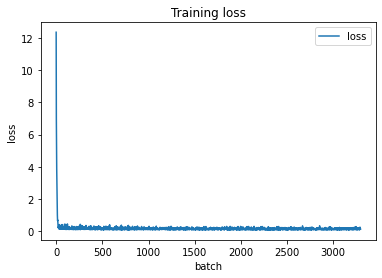

In [25]:
# paint training loss graph
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.title('Training loss')
plt.ylabel('loss')
plt.xlabel('batch')
plt.legend(['loss'], loc='upper right')
plt.show()

### 模型存檔

In [26]:
import os

dir_path = r"./models/DGen/"

if not os.path.exists(dir_path):
  os.mkdir(dir_path)

model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(os.path.join(dir_path, "BERT_CLOTH_valid_model"))

In [ ]:
del model
torch.cuda.empty_cache()

## 載入模型並初始化

* uncased_model, acc = 54.56%
* cloze_model
  * mask_model1: batch = 32, epoch = 1, answer, train, max_length = 50, acc = 46.11%
  * mask_model2: batch = 32, epoch = 1, answer, train+valid, max_length = 50, acc = 57.25%
  * mask_model3: batch = 64, epoch = 1, answer, train+valid, max_length = 50, acc = 56.74%
  * mask_model4: batch = 64, epoch = 1, answer, train+valid, max_length = 75, acc = 55.4%
  * mask_model5: batch = 32, epoch = 1, distractor, train+valid, max_length = 50, acc = 47.29%
  * mask_model6: batch = 64, epoch = 1, distractor, train+valid, max_length = 50, acc = 48.68%
  * mask_model7: batch = 64, epoch = 1, distractor, (train+valid)*3, max_length = 50, acc = 49.58%
  * mask_model8: batch = 64, epoch = 1, distractor(only first)
  * mask_model9: batch = 64, epoch = 1, distractor(only first) + sep + ans
  * mask_model10: batch = 64, epoch = 1, distractor(only first) + sep + ans
  * mask_model11: batch = 64, epoch = 1, answer
  * mask_model12: batch = 64, epoch = 1, distractor(three) + sep + ans

In [ ]:
from transformers import BertTokenizer, BertConfig, BertForMaskedLM
import torch
import os

dir_path = r"./cloze_model/mask_model12"

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
config = BertConfig.from_pretrained(os.path.join(dir_path, "config.json"))
model = BertForMaskedLM.from_pretrained(os.path.join(dir_path, "pytorch_model.bin"), from_tf=bool('.ckpt' in 'bert-base-uncased'), config=config)
model.eval()

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tr

In [ ]:
from transformers import BertTokenizer, BertConfig, BertForMaskedLM
import torch
import os

dir_path = r"./cloze_model/mask_model11"

tokenizer2 = BertTokenizer.from_pretrained('bert-base-uncased')
config2 = BertConfig.from_pretrained(os.path.join(dir_path, "config.json"))
model2 = BertForMaskedLM.from_pretrained(os.path.join(dir_path, "pytorch_model.bin"), from_tf=bool('.ckpt' in 'bert-base-uncased'), config=config)
model2.eval()

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tr

In [ ]:
encoded_input = tokenizer(text1, return_tensors='pt')
output = model(**encoded_input)
print(output)

MaskedLMOutput(loss=None, logits=tensor([[[  3.0597,  -5.6434,  -6.2263,  ...,  -8.5850, -11.3926, -11.8807],
         [ -1.5745,  -5.5991,  -5.8501,  ...,  -7.5392,  -8.3027,  -8.4193],
         [ -1.3186,  -6.5892,  -6.6419,  ...,  -8.1446,  -9.0110, -13.6897],
         ...,
         [  0.8833,  -3.9259,  -4.0631,  ...,  -4.5177,  -5.5960, -10.4872],
         [ -1.3905,  -5.4103,  -5.7676,  ...,  -6.0785,  -6.8616, -10.9272],
         [  3.3413,  -3.9432,  -4.1918,  ...,  -6.2645,  -7.4607, -12.5026]]],
       grad_fn=<AddBackward0>), hidden_states=None, attentions=None)


In [ ]:
text1 = "My heart [MASK] when I was asked to the back room by the immigration officer."
# sank
text2 = "My [MASK] , with his very American last name, had no trouble at all."
# husband
text3 = "I am [MASK] American born and raised, but they weren't quite ready to let me in yet."
# also
text4 = "I remember sitting in that dark hall listening to Mr. Zigler [MASK] everyone's spirits up to the ceiling."
# raise
text5 = "I [MASK] there feeling like I could do anything."
# left -> came, arrived, reached
text6 = "The first two [MASK] there were for persons requiring [MASK] in taking care of themselves."
text7 = "The first two [MASK] there were for persons requiring help in taking care of themselves."
text8 = "The first two floors there were for persons requiring [MASK] in taking care of themselves."
# floors -> rooms, buildings, groups
# help -> comfort, music, happiness
text9 = "To make Jane live a [MASK] life, Mother was very careful about spending money."
# "happy" -> "poor", "busy", "sad"
text10 = "[MASK] , Jane didn't understand her."
# "However" -> "Though", "Although", "Or"
text11 = "Every day Mother was busy with her [MASK] while Jane was studying at school, so they had little time to enjoy themselves."
# "work" -> "writing", "housework", "research"
text12 = "One day, Mother realized Jane was unhappy and even [MASK] to her."
# "unfriendly" -> "loyal", "kind", "cruel"
# -----------------------------------------------------------------------------------------------------------------------------------------------
text13 = "To make Jane live a [MASK] life, Mother was very careful about spending money. [SEP] happy"
# "happy" -> "poor", "busy", "sad"
text14 = "[MASK] , Jane didn't understand her. [SEP] However"
# "However" -> "Though", "Although", "Or"
text15 = "Every day Mother was busy with her [MASK] while Jane was studying at school, so they had little time to enjoy themselves. [SEP] work"
# "work" -> "writing", "housework", "research"
text16 = "One day, Mother realized Jane was unhappy and even [MASK] to her."
text16_2 = "One day, Mother realized Jane was unhappy and even [MASK] to her. [SEP] unfriendly"
# "unfriendly" -> "loyal", "kind", "cruel"
text17 = "The wait seemed [MASK] . [SEP] endless"
# "endless" -> "meaningless", "useless", "careless"
text18 = "The old man was waiting for a ride across the [MASK] . [SEP] river"
# "river" -> "town", "country", "island"
text19 = "I felt uncomfortable and out of place as the professor carefully [MASK] what she expected us to learn. [SEP] explained"
# "explained" -> "showed", "designed", "offered"
text20 = "As I listened, I couldn't help but [MASK] of my own oldest daughter."
# "think" -> "speak", "talk", "hear"
text20_2 = "As I listened, I couldn't help but [MASK] of my own oldest daughter. [SEP] think"
# "think" -> "speak", "talk", "hear"
text21 = "As I listened, I couldn't help but think of my own oldest daughter who was now beginning her first year in [MASK], just like me. [SEP] college"
# "college" -> "school", "office", "classroom"
text22 = "Today morning, I saw a [MASK] sitting on the wall. [SEP] cat"
text23 = "Ukrainian presidential adviser says situation is '[MASK] control' in suburbs and outskirts of Kyiv. [SEP] under"
text24 = "I don't think that after what is [MASK] now, Ukraine has weak positions. [SEP] happening"

### 我的

In [ ]:
from transformers import pipeline
my_unmasker = pipeline('fill-mask', tokenizer=tokenizer, config=config, model=model, top_k=10)

In [ ]:
my_unmasker(text24)

[{'score': 0.1416187584400177,
  'sequence': "i don't think that after what is changing now, ukraine has weak positions. happening",
  'token': 5278,
  'token_str': 'c h a n g i n g'},
 {'score': 0.03285578265786171,
  'sequence': "i don't think that after what is disappearing now, ukraine has weak positions. happening",
  'token': 14489,
  'token_str': 'd i s a p p e a r i n g'},
 {'score': 0.031588733196258545,
  'sequence': "i don't think that after what is moving now, ukraine has weak positions. happening",
  'token': 3048,
  'token_str': 'm o v i n g'},
 {'score': 0.029270747676491737,
  'sequence': "i don't think that after what is happening now, ukraine has weak positions. happening",
  'token': 6230,
  'token_str': 'h a p p e n i n g'},
 {'score': 0.01956036500632763,
  'sequence': "i don't think that after what is leaving now, ukraine has weak positions. happening",
  'token': 2975,
  'token_str': 'l e a v i n g'},
 {'score': 0.019313571974635124,
  'sequence': "i don't think 

In [ ]:
from transformers import pipeline
my_unmasker2 = pipeline('fill-mask', tokenizer=tokenizer2, config=config2, model=model2, top_k=10)

In [ ]:
my_unmasker2(text24)

[{'score': 0.6492176651954651,
  'sequence': "i don't think that after what is happening now, ukraine has weak positions. happening",
  'token': 6230,
  'token_str': 'h a p p e n i n g'},
 {'score': 0.05530388280749321,
  'sequence': "i don't think that after what is over now, ukraine has weak positions. happening",
  'token': 2058,
  'token_str': 'o v e r'},
 {'score': 0.03287101536989212,
  'sequence': "i don't think that after what is happened now, ukraine has weak positions. happening",
  'token': 3047,
  'token_str': 'h a p p e n e d'},
 {'score': 0.01894104667007923,
  'sequence': "i don't think that after what is coming now, ukraine has weak positions. happening",
  'token': 2746,
  'token_str': 'c o m i n g'},
 {'score': 0.014097553677856922,
  'sequence': "i don't think that after what is done now, ukraine has weak positions. happening",
  'token': 2589,
  'token_str': 'd o n e'},
 {'score': 0.012751945294439793,
  'sequence': "i don't think that after what is occurring now, u

### 原本的

In [ ]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-uncased', top_k=10)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
unmasker(text24)

[{'score': 0.8708781003952026,
  'sequence': "i don't think that after what is happening now, ukraine has weak positions. happening",
  'token': 6230,
  'token_str': 'happening'},
 {'score': 0.03300117701292038,
  'sequence': "i don't think that after what is happened now, ukraine has weak positions. happening",
  'token': 3047,
  'token_str': 'happened'},
 {'score': 0.023235267028212547,
  'sequence': "i don't think that after what is coming now, ukraine has weak positions. happening",
  'token': 2746,
  'token_str': 'coming'},
 {'score': 0.011834490112960339,
  'sequence': "i don't think that after what is over now, ukraine has weak positions. happening",
  'token': 2058,
  'token_str': 'over'},
 {'score': 0.008965300396084785,
  'sequence': "i don't think that after what is occurring now, ukraine has weak positions. happening",
  'token': 10066,
  'token_str': 'occurring'},
 {'score': 0.00518603902310133,
  'sequence': "i don't think that after what is done now, ukraine has weak pos

In [ ]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-cased')

### Testing

In [ ]:
test_unmasker = my_unmasker

In [ ]:
# 測試正確率
en2num = {"A": 0, "B": 1, "C": 2, "D": 3}

test_path = "./CLOTH/test"
total_count = 0
correct_count = 0

for grade in ["high", "middle"]:
  grade_path = os.path.join(test_path, grade)
  # print(grade_path)

  files = os.listdir(grade_path)
  # print(files)

  fc = 0
  for file in tqdm(files):
    full_path = os.path.join(grade_path, file)
    print(full_path)
    with open(full_path, "r") as f:
      dataset = json.load(f)

    sents = nltk.sent_tokenize(dataset["article"])
    options = dataset["options"]
    answers = dataset["answers"]

    i = 0
    for sent in sents:
      if "_" in sent:
        input_text = sent
        label_list = list()
        try:
          while "_" in input_text:
            input_text = input_text.replace("_", "[MASK]", 1)
            label_list.append(options[i][en2num[answers[i]]].lower())
            i += 1
            # print(i)
        except Exception as e:
          print(e)
          pass

        # print(input_text)
        # print(label_text)
        # print("-"*50)

        results = test_unmasker(input_text)
        if input_text.count("[MASK]") > 1:
          for j in range(len(results)):
            result_list = list()
            for res in results[j]:
              # print(res)
              # print(res["token_str"].replace(" ", ""))
              result_list.append(res["token_str"].replace(" ", ""))
          
            # print(result_list)
            # print(label_list[j])
            total_count += 1
            if label_list[j] in result_list:
              correct_count += 1
              # print("Correct!")
        else:
          result_list = list()
          for res in results:
            # print(res)
            # print(res["token_str"].replace(" ", ""))
            result_list.append(res["token_str"].replace(" ", ""))

          # print(result_list)
          # print(label_list[0])
          total_count += 1
          if label_list[0] in result_list:
            correct_count += 1
            # print("Correct!")

    if fc == 100:
      break
    fc += 1

  break

print(f"{correct_count} / {total_count} = {round((correct_count/total_count)*100, 2)}%")

  0%|          | 0/478 [00:00<?, ?it/s]

./CLOTH/test/high/high3761.json
./CLOTH/test/high/high3987.json
./CLOTH/test/high/high3978.json
./CLOTH/test/high/high4067.json
./CLOTH/test/high/high4019.json
./CLOTH/test/high/high3866.json
./CLOTH/test/high/high3740.json
./CLOTH/test/high/high4040.json
./CLOTH/test/high/high3843.json
./CLOTH/test/high/high3832.json
./CLOTH/test/high/high3868.json
./CLOTH/test/high/high3933.json
./CLOTH/test/high/high4031.json
./CLOTH/test/high/high3944.json
./CLOTH/test/high/high3958.json
./CLOTH/test/high/high3909.json
./CLOTH/test/high/high3852.json
./CLOTH/test/high/high3965.json
./CLOTH/test/high/high3827.json
./CLOTH/test/high/high3734.json
./CLOTH/test/high/high3936.json
./CLOTH/test/high/high3703.json
./CLOTH/test/high/high3634.json
./CLOTH/test/high/high4023.json
./CLOTH/test/high/high4007.json
./CLOTH/test/high/high3712.json
./CLOTH/test/high/high3668.json
./CLOTH/test/high/high4058.json
./CLOTH/test/high/high3781.json
./CLOTH/test/high/high3971.json
./CLOTH/test/high/high3969.json
./CLOTH/

## Test

In [ ]:
!pip install nltk
import nltk
nltk.download("abc")
from nltk.corpus import abc
nltk.download('punkt')

In [ ]:
import random
def random_mask(input_list):
  masked_list = list.copy(input_list)
  masked_list[random.randint(0, len(input_list)-1)]="[MASK]"
  return masked_list

sentens_list = abc.sents()
input_sentences = [ " ".join(sen) for sen in sentens_list]
masked_sentences = [ " ".join(random_mask(sen)) for sen in sentens_list]

In [ ]:
print(input_sentences[:100])

In [ ]:
print(masked_sentences[:100])

## padding before dataset

In [ ]:
from transformers import BertTokenizer, BertForMaskedLM

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

input_encodings = tokenizer(inputs_list, truncation=True, padding="max_length", max_length=30, return_tensors="pt")
label_encodings = tokenizer(labels_list, truncation=True, padding="max_length", max_length=30, return_tensors="pt")

In [ ]:
print(input_encodings["input_ids"].shape)
print(label_encodings["input_ids"].shape)

In [ ]:
input_encodings.keys()

In [ ]:
index = 0

print((tokenizer.convert_ids_to_tokens(input_encodings.input_ids[index])))
print()
print(tokenizer.decode(input_encodings.input_ids[index]))
print()
print(input_encodings.attention_mask[index])

In [ ]:
index = 0

print((tokenizer.convert_ids_to_tokens(label_encodings.input_ids[index])))
print()
print(tokenizer.decode(label_encodings.input_ids[index]))
print()
print(label_encodings.attention_mask[index])

In [ ]:
import torch

class WNDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, index):
        input_ids = torch.tensor(self.encodings["input_ids"][index]).squeeze()
        labels = torch.tensor(self.labels["input_ids"][index]).squeeze()
        
        return {"input_ids": input_ids, "labels": labels}

    def __len__(self):
        return len(self.encodings.input_ids)

In [ ]:
train_dataset = WNDataset(input_encodings, label_encodings)

In [ ]:
print(train_dataset[0])

In [ ]:
!nvidia-smi

Sat Feb 19 09:37:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------